## CNN(합성곱 신경망, convolution neural network)
+ 이미지인식, 음성인식 등에 자주 사용되는데, 특히 이미지인식 분야에서 거의 모든 딥러닝 기술에 사용됨  
+ 컨볼루션 신경망 구조 예시  
<br>
<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">  
<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>

### 합성곱 연산
+ 필터 연산
    + 입력 데이터와 필터를 대응하는 값끼리 곱하고, 그 합을 구함
    + 그 결과를 특징맵(feature map)이라 부름
+ filter(=kernel)
    + 필터의 사이즈는 거의 항상 홀수(짝수이면 padding이 비대칭으로 되기 때문)
    + 왼쪽, 오른쪽을 다르게 주어야 함
    + 중심위치가 존재, 즉 구별된 하나의 중심 픽셀이 존재
    + 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정하기 때문에, 과적합을 방지할 수 있음
+ 연산 시각화  
<br>
<img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">  
<sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>

+ 일반적으로 합성곱 연산한 결과 feature map의 크기는 (n-f+1)*(n-f+1)
    + n = 입력 데이터의 크기
    + f = filter의 크기  
<br>
<img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">  
<sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>


#### Padding
+ 입력 데이터의 주변을 특정 값(주로 0)으로 채우는 기법
+ 출력 데이터의 크기는 (n+2p-f+1)*(n+2p-f+1)
+ p = 패딩값(몇칸을 채워넣을지)
+ 'valid' : 패딩을 주지 않음
+ 'same' : 패딩을 주어 입력 이미지의 크기와 feature map 크기를 같게 함


#### Stride 
+ 필터를 적용하는 간격


#### Pooling
+ filter 사이즈 내에서 특정 값을 추출하는 과정
+ MaxPooling 
    + 영역 내 최대값을 선택하는 방법으로, 가장 많이 사용됨
    + 보통 stride=2, kernel_size=2를 통해 feature map의 크기를 절반으로 줄임
    + 모델이 물체의 주요한 특징을 학습할 수 있도록 해줌
    + CNN이 이동불변성 특성을 가지게 해줌(아래 그림에서 같은 색 안의 값이라면 위치가 바뀌더라도 max값은 불변)
    + 모델의 파라미터 개수를 줄여주고, 연산속도를 빠르게 해줌
    
<br>
<img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">  

<sub>출처: https://cs231n.github.io/convolutional-networks</sub>


### Conv1D
+ 텍스트분류나 시계열예측 같은 간단한 문제, 오디오 생성, 기계번역 등의 문제에서 좋은 성능을 보임
+ 타임스텝의 순서에 민감하지 않음
+ 1D Convolution
    + 문맥을 인식
    + Conv1D Layer
        + 입력: `(batch_size, timesteps, channels)`
        + 출력: `(batch_size, timesteps, filters)`
        + 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
        + 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음
    + MaxPooling1D Layer
        + 다운 샘플링 효과(단지 1차원형태로 바뀐 것 뿐)
+ 2D Convolution
    + 지역적 특징을 인식

### GlobalMaxPooling Layer
+ 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어
+ Flatten layer로 대신 사용가능

### IMDB 데이터 사용해보기

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

num_words = 10000   
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((25000,), (25000,), (25000,), (25000,))

In [2]:
max_len = 500
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

padded_x_train.shape, padded_x_test.shape

((25000, 500), (25000, 500))

In [3]:
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Conv1D(filters=32, kernel_size=7, activation='relu'),  
                    MaxPooling1D(7),
                    Conv1D(filters=32, kernel_size=5, activation='relu'),
                    MaxPooling1D(5),
                    GlobalMaxPooling1D(),             #Flatten 효과
                    Dense(1, activation='sigmoid')])  #긍정/부정 이진분류
    
model.compile(optimizer=RMSprop(learning_rate=0.005), loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [4]:
history = model.fit(padded_x_train, y_train, 
                    epochs=50, verbose=0,
                    batch_size=64,
                    validation_split=0.2)

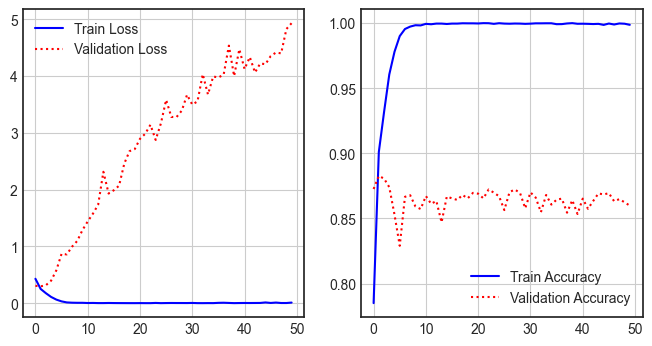

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [6]:
model.evaluate(padded_x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[5.147247379400377, 0.84588]

### 로이터 데이터 사용해보기

In [7]:
from tensorflow.keras.datasets import reuters

num_words = 10000   
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [8]:
max_len = 500
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

padded_x_train.shape, padded_x_test.shape

((8982, 500), (2246, 500))

In [9]:
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Conv1D(filters=32, kernel_size=7, activation='relu'),  
                    MaxPooling1D(7),
                    Conv1D(filters=32, kernel_size=5, activation='relu'),
                    MaxPooling1D(5),
                    GlobalMaxPooling1D(),             #Flatten 효과
                    Dense(46, activation='softmax')])  #다중분류
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)               

In [10]:
history = model.fit(padded_x_train, y_train, 
                    epochs=50, verbose=0,
                    batch_size=64,
                    validation_split=0.2)

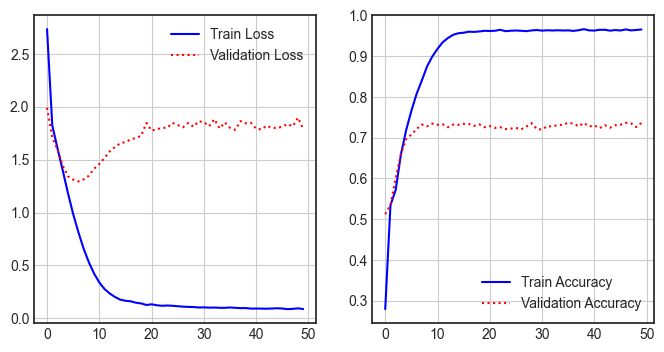

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [12]:
model.evaluate(padded_x_test, y_test)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.742364037174894, 0.7275156]

### CNN을 이용한 스팸메일 분류

In [22]:
import urllib.request
import pandas as pd
urllib.request.urlretrieve('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', filename='spam.csv')

data = pd.read_csv('spam.csv', encoding='latin-1')

print(len(data))
data.head(3)

5572


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [23]:
data = data.loc[:, ['v1', 'v2']]
data = data.drop_duplicates(subset=['v2'])
data['v1'] = data['v1'].replace(['ham', 'spam'], [0,1])

print(len(data))
data.head(3)

5169


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


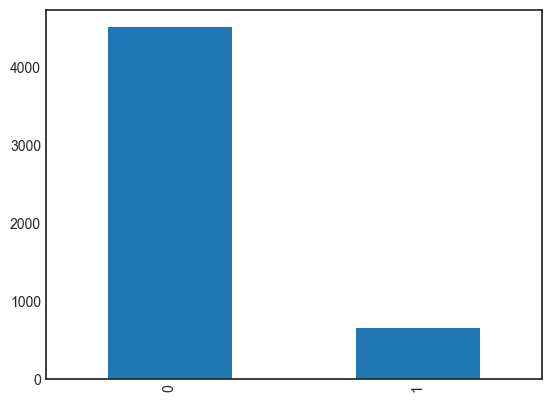

In [25]:
#target 분포 확인
data['v1'].value_counts().plot(kind='bar');

Max length : 172
Avg length : 12.566840781582512


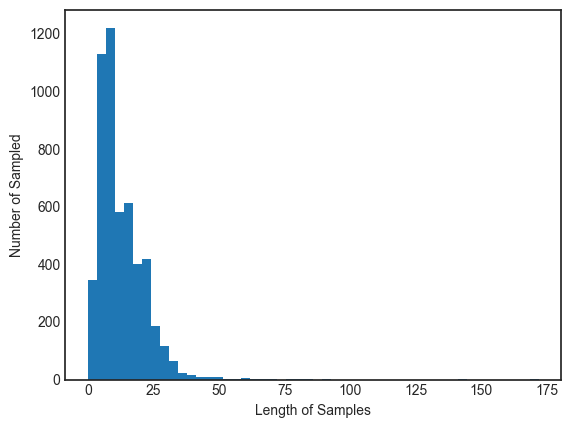

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

X, y = data['v2'], data['v1']

vocab_size = 1000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X) 
sequences = tokenizer.texts_to_sequences(X)   #토큰에 인덱스 추가
X = sequences

print('Max length : {}'.format(max(len(l) for l in X)))
print('Avg length : {}'.format(sum(map(len, X))/len(X)))

plt.hist([len(s) for s in X], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Sampled');

In [29]:
import numpy as np

max_len = 60
data = pad_sequences(X, maxlen = max_len)
print(data.shape) 

num_train = int(len(X)*0.8)
num_test = int(len(X) - num_train)
print(num_train)
print(num_test) 

X_train = data[:num_train]
y_train = np.array(y[:num_train])
X_test = data[num_train:]
y_test = np.array(y[num_train:])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5169, 60)
4135
1034
(4135, 60) (4135,) (1034, 60) (1034,)


In [30]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding,Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([Embedding(vocab_size, 32),
                    Dropout(0.2),
                    Conv1D(32, 5, strides=1, padding='valid', activation='relu'),
                    GlobalMaxPooling1D(),
                    Dense(64, activation='relu'),
                    Dropout(0.2),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('spam_best_model.h5', monitor='val_acc', mode = 'max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs = 10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Train on 3308 samples, validate on 827 samples
Epoch 1/10
2624/3308 [======================>.......] - ETA: 0s - loss: 0.5108 - acc: 0.8582
Epoch 00001: val_acc improved from -inf to 0.87304, saving model to best_model.h5
3308/3308 [==============================] - 1s 227us/sample - loss: 0.4782 - acc: 0.8640 - val_loss: 0.3778 - val_acc: 0.8730
Epoch 2/10
3264/3308 [============================>.] - ETA: 0s - loss: 0.3600 - acc: 0.8698
Epoch 00002: val_acc did not improve from 0.87304
3308/3308 [==============================] - 0s 71us/sample - loss: 0.3589 - acc: 0.8697 - val_loss: 0.2888 - val_acc: 0.8730
Epoch 3/10
2752/3308 [=======================>......] - ETA: 0s - loss: 0.2010 - acc: 0.8979
Epoch 00003: val_acc improved from 0.87304 to 0.98186, saving model to best_model.h5
3308/3308 [==============================] - 0s 74us/sample - loss: 0.1841 - acc: 0.9123 - val_loss: 0.0968 - val_acc: 0.9819
Epoch 4/10
2624/3308 [======================>.......] - ETA: 0s - loss: 0.0694

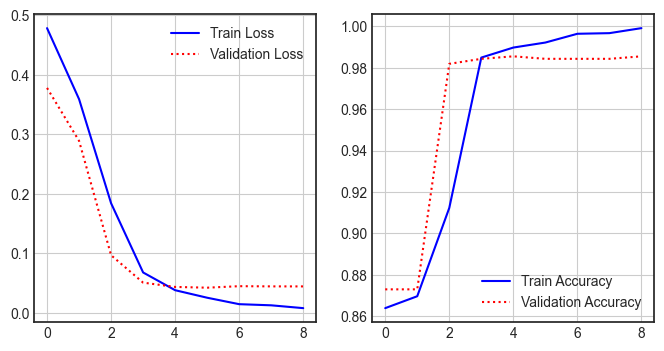

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [34]:
from tensorflow.keras.models import load_model

loaded_model = load_model('spam_best_model.h5')

loaded_model.evaluate(X_test, y_test)

1034/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06386144305002917, 0.98549324]